# Wearable Device Data Analysis 


In this exercise, you will go through the process of training a machine learning model apply MLOps principles to manage and monitor your machine learning pipeline 

## Dataset Overview :

This dataset contains  signals collected by wearable devices that monitor various human activities and vital signs. It includes time series data for activities like walking, running, sitting, and vital signs such as heart rate and body temperature, recorded over different intervals.

Features:

- Activity Type: Categorical variable indicating the type of activity (e.g., walking, running, sitting, etc.).
- Heart Rate (BPM): Continuous variable representing beats per minute.
- Body Temperature (°C): Continuous variable representing the user's body temperature.
- Acceleration (m/s²): Three continuous variables representing acceleration on the x, y, and z axes.
- Timestamp: Time variable indicating when the reading was taken.

Labels:

- Stressed State: Binary variable indicating whether the vital signs correspond to a stressed state (1) or a relaxed state (0), which will be the target for our classifier.

You should use this dataset to train a classifier that predicts whether a person is stressed based on their activity type, heart rate, body temperature, and movement patterns.



## Exercise: Data Analysis

- Load the dataset provided in AMETICE page : "Wearable_Device_Dataset.csv", use describe(), info(), and head(), isnull() to get an overview of the data.



In [2]:
import pandas as pd
import numpy as np 

data = pd.read_csv("data/device.csv")

data.head()

,Activity Type,Heart Rate (BPM),Body Temperature (°C),Acceleration X (m/s²),Acceleration Y (m/s²),Acceleration Z (m/s²),Stressed State
0,walking,66.681663,37.236851,-0.675178,-1.907808,-0.863494,False
1,cycling,80.490124,37.070160,-0.144519,-0.860385,-0.031203,False
2,walking,70.650875,36.507567,-0.792420,-0.413606,0.018017,True
3,cycling,92.427842,36.183344,-0.307962,1.887688,0.472630,True
4,running,97.867898,36.897490,-1.893615,0.556553,-1.366858,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Activity Type          1000 non-null   object 
 1   Heart Rate (BPM)       1000 non-null   float64
 2   Body Temperature (°C)  1000 non-null   float64
 3   Acceleration X (m/s²)  1000 non-null   float64
 4   Acceleration Y (m/s²)  1000 non-null   float64
 5   Acceleration Z (m/s²)  1000 non-null   float64
 6   Stressed State         1000 non-null   bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 48.0+ KB


On change le type de :
- Activity type à String 

- Stressed State : True: 1, False: 0



In [4]:
data['Activity Type'] = data['Activity Type'].astype('string')
data['Stressed State'] = data['Stressed State'].replace({True: 1, False: 0})


/var/folders/23/s5yrd0217ns3vlhm0pnf4jhw0000gn/T/ipykernel_95074/1643714695.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Stressed State'] = data['Stressed State'].replace({True: 1, False: 0})


In [5]:
data.describe()

,Heart Rate (BPM),Body Temperature (°C),Acceleration X (m/s²),Acceleration Y (m/s²),Acceleration Z (m/s²),Stressed State
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,81.508765,36.534239,0.005834,-0.018719,-0.049274,0.506000
std,19.844475,0.510322,0.983454,1.027133,0.992380,0.500214
min,31.298668,34.790434,-3.019512,-2.929449,-3.176704,0.000000
25%,66.262109,36.192353,-0.648000,-0.737420,-0.682605,0.000000
50%,78.936837,36.538253,-0.000251,0.000185,-0.018242,1.000000
75%,94.029940,36.890435,0.660915,0.666945,0.639123,1.000000
max,160.412135,38.187031,3.926238,3.243093,3.112910,1.000000


In [6]:
data.isnull()

,Activity Type,Heart Rate (BPM),Body Temperature (°C),Acceleration X (m/s²),Acceleration Y (m/s²),Acceleration Z (m/s²),Stressed State
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

Activity Type            0
Heart Rate (BPM)         0
Body Temperature (°C)    0
Acceleration X (m/s²)    0
Acceleration Y (m/s²)    0
Acceleration Z (m/s²)    0
Stressed State           0
dtype: int64

D'après la fonction isnull on trouve que notre dataset ne contient aucune valeur nulle

In [8]:
data.head()

,Activity Type,Heart Rate (BPM),Body Temperature (°C),Acceleration X (m/s²),Acceleration Y (m/s²),Acceleration Z (m/s²),Stressed State
0,walking,66.681663,37.236851,-0.675178,-1.907808,-0.863494,0
1,cycling,80.490124,37.070160,-0.144519,-0.860385,-0.031203,0
2,walking,70.650875,36.507567,-0.792420,-0.413606,0.018017,1
3,cycling,92.427842,36.183344,-0.307962,1.887688,0.472630,1
4,running,97.867898,36.897490,-1.893615,0.556553,-1.366858,1


### Explore and Visualize the Data
* Provide a statistical summary of the data.
* Create visualizations to understand the relationships in the data.
- Plot histograms and boxplots for numerical features to understand distributions.
- Plot bar charts for the categorical 'Activity Type' feature to check class balance.
- Explore the relationship between features and the target variable (stressed state)

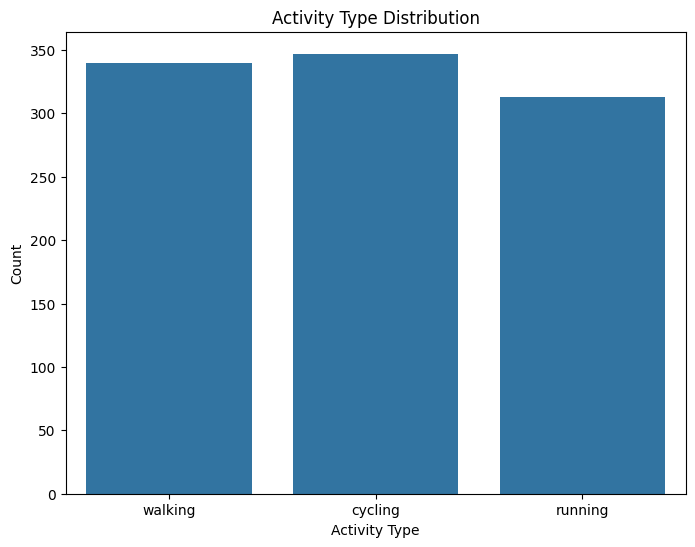

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Activity Type')
plt.title('Activity Type Distribution')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.show()


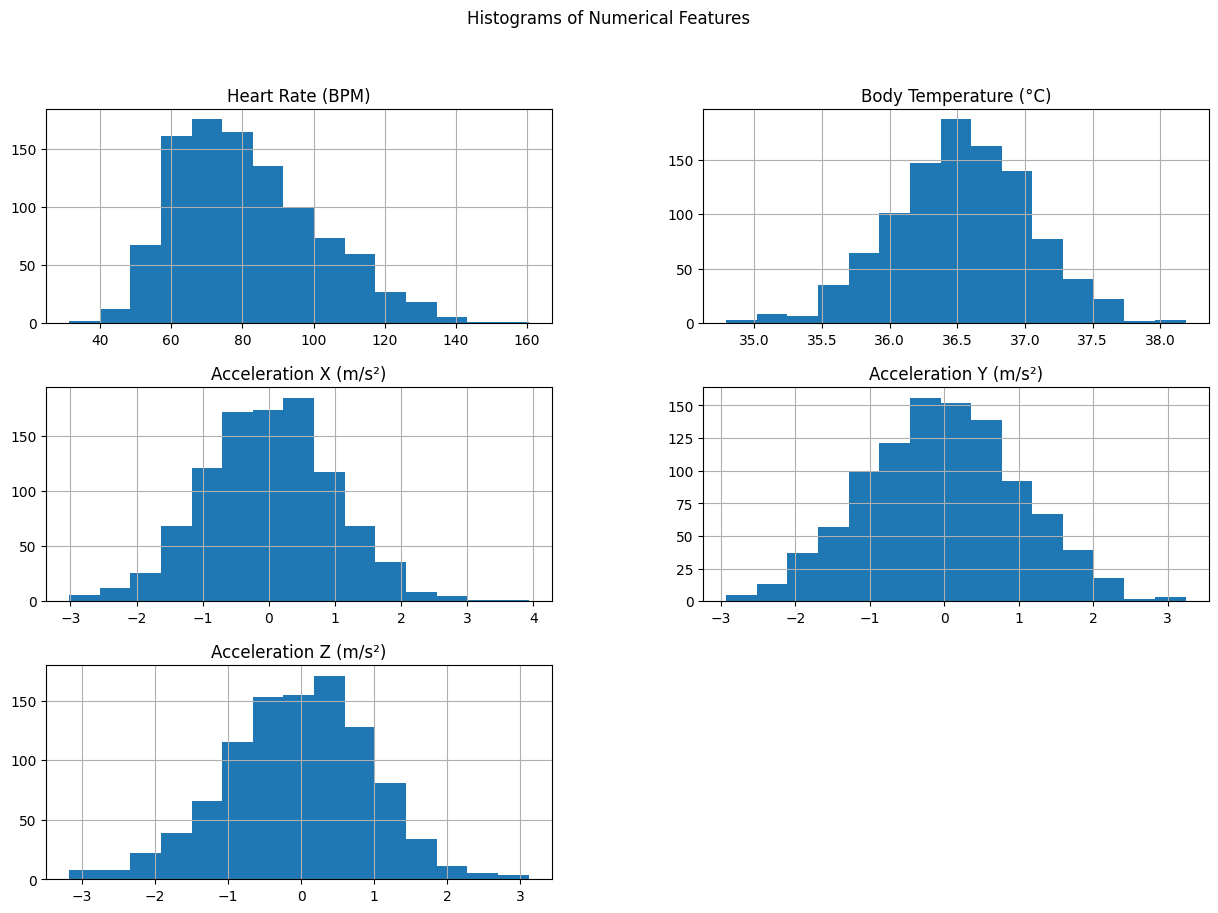

In [10]:
numerical_features = ['Heart Rate (BPM)', 'Body Temperature (°C)', 'Acceleration X (m/s²)', 'Acceleration Y (m/s²)', 'Acceleration Z (m/s²)']

data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

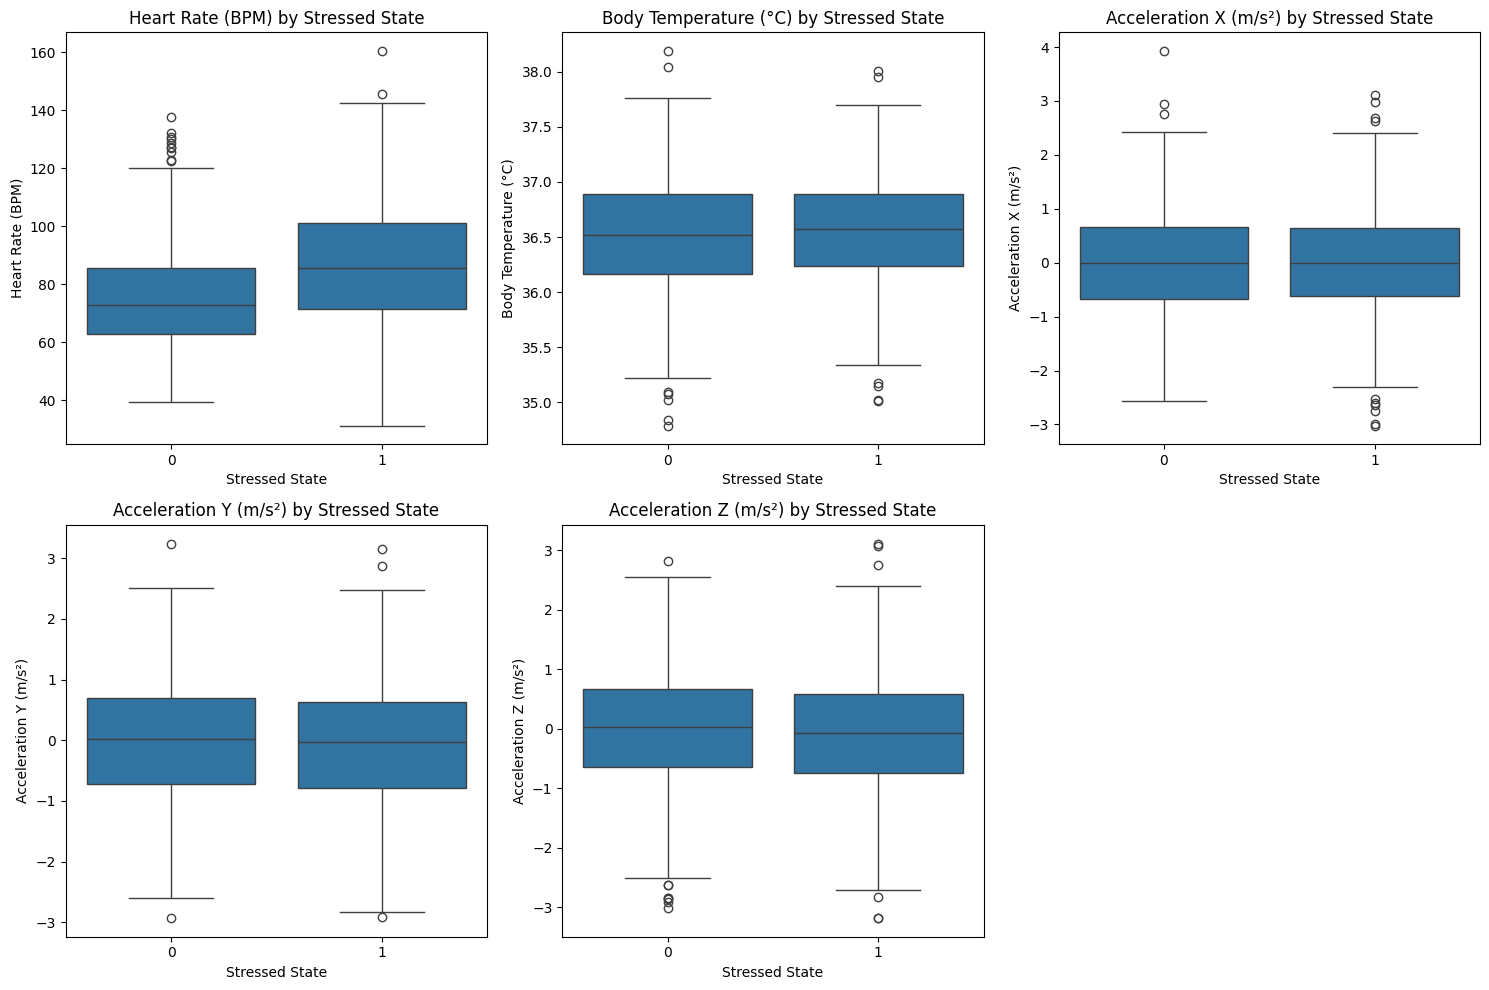

In [11]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x='Stressed State', y=feature)
    plt.title(f'{feature} by Stressed State')
plt.tight_layout()
plt.show()

## Exercise: Data Preprocessing

### Task: Handle Categorical Data and Split the Dataset
* Convert categorical data to a suitable format for machine learning.
* Split the data into training and test sets.

In [12]:
from sklearn.model_selection import train_test_split

df = pd.get_dummies(data, columns=['Activity Type'], drop_first=True)


X = df.drop('Stressed State', axis=1)
y = df['Stressed State']

# We split the data: 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Exercise: Model Training

### Task: Train Logistic Regression and Random Forest Classifiers
* Use the preprocessed data to train the models.
* Feel free to tweak model parameters.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# On entraîne le modèle de régression logistique
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


In [14]:
# On entraine le modèle de forêt aléatoire
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## Exercise: Model Evaluation

### Task: Evaluate the Performance of Your Models
* Use appropriate metrics to evaluate your models.
* Compare the results of both models.

Logistic Regression Metrics:
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69       101
           1       0.70      0.47      0.57        99

    accuracy                           0.64       200
   macro avg       0.66      0.64      0.63       200
weighted avg       0.65      0.64      0.63       200



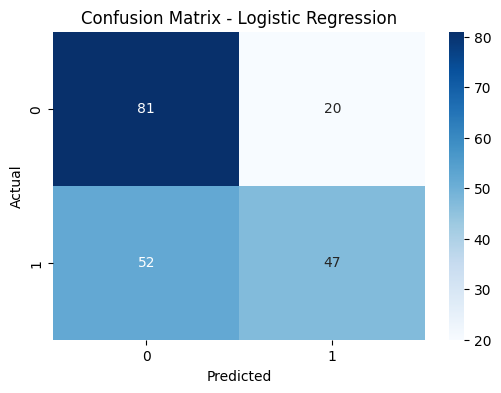

Random Forest Metrics:
Accuracy: 0.63
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       101
           1       0.62      0.64      0.63        99

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.63      0.63       200



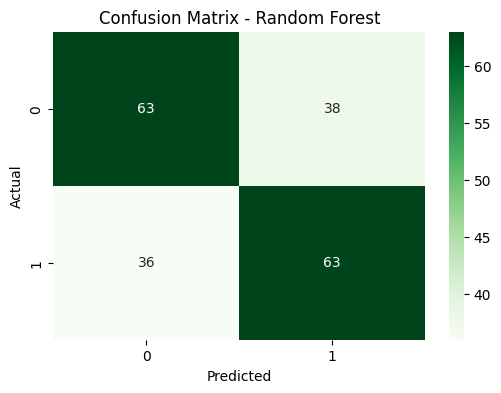

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Matrice de confusion pour la régression logistique
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Évaluation du modèle de forêt aléatoire
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Matrice de confusion pour la forêt aléatoire
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Amélioration du model :

In [25]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Teste différentes valeurs pour la régularisation
    'penalty': ['l1', 'l2'],  # Différentes régularisations (L1, L2)
    'solver': ['liblinear']   # Utilisation du solveur 'liblinear' compatible avec les pénalités L1 et L2
}

logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


best_model = grid_search.best_estimator_

# Évaluation du modèle sur les données de test
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Résultats
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.63
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.73      0.67       101
           1       0.66      0.53      0.58        99

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.63      0.63       200



## Introduction to MLflow Monitoring

MLflow is a platform for managing the machine learning lifecycle, including experimentation, reproducibility, and deployment. You will use MLflow to track your experiments in this exercise. check the documentation: https://mlflow.org/docs/latest/index.html

## Exercise: MLflow Monitoring

### Task: Integrate MLflow for Experiment Tracking
* Set up MLflow in your notebook.
* Log parameters, metrics, and models for each experiment you run.

## Conclusion 

Write some note about the performance of the classifiers and the insights gained from the data analysis and MLflow monitoring.
Consider exploring more in-depth analysis or trying different machine learning models.